# 1. Importing libraries and load data


In [1]:

import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

path = os.getcwd()
#pd.set_option('display.max_columns', 500)

cardata = pd.read_csv(path+"\\cars_data.csv")

cardata

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


In [2]:
#Display feature columns
cardata.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [3]:
#Check the shape of the dataframe
cardata.shape

(428, 15)

# 2. Cleaning and exploring dataset

In [4]:
#Check for missing values
cardata.isna().sum(axis=0)

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [5]:
#Locate records with missing values
cardata[cardata.isna().any(axis=1)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


In [6]:
#Dropping the rows with missing values as they are just a few and it wont make any difference
cardata2 = cardata.dropna(axis=0)

In [7]:
# Check non-null values after drop na.
cardata2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [8]:
#Remove $ and , from the string
cardata2['MSRP'] = cardata2['MSRP'].str.replace('$', '')
cardata2['Invoice'] = cardata2['Invoice'].str.replace('$', '')
cardata2['MSRP'] = cardata2['MSRP'].str.replace(',', '')
cardata2['Invoice'] = cardata2['Invoice'].str.replace(',', '')

# Convert MSRP and Invoice columns datatype to integers
cardata2['MSRP'] = pd.to_numeric(cardata2['MSRP'])
cardata2['Invoice'] = pd.to_numeric(cardata2['Invoice'])

C:\Users\Edwin\AppData\Local\Temp\ipykernel_31200\39003911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardata2['MSRP'] = cardata2['MSRP'].str.replace('$', '')
C:\Users\Edwin\AppData\Local\Temp\ipykernel_31200\39003911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardata2['Invoice'] = cardata2['Invoice'].str.replace('$', '')
C:\Users\Edwin\AppData\Local\Temp\ipykernel_31200\39003911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [9]:
cardata2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 53.2+ KB


In [10]:
cardata2.describe(include='all')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426,426,426,426,426,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
unique,38,423,6,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C240 4dr,Sedan,Asia,Front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,156,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32804.549296,30040.654930,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,NaN,NaN,NaN,NaN,NaN,19472.460825,17679.430122,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,NaN,NaN,NaN,NaN,NaN,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,20324.750000,18836.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,27807.500000,25521.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,39225.000000,35754.750000,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000


# 3. Data visualization

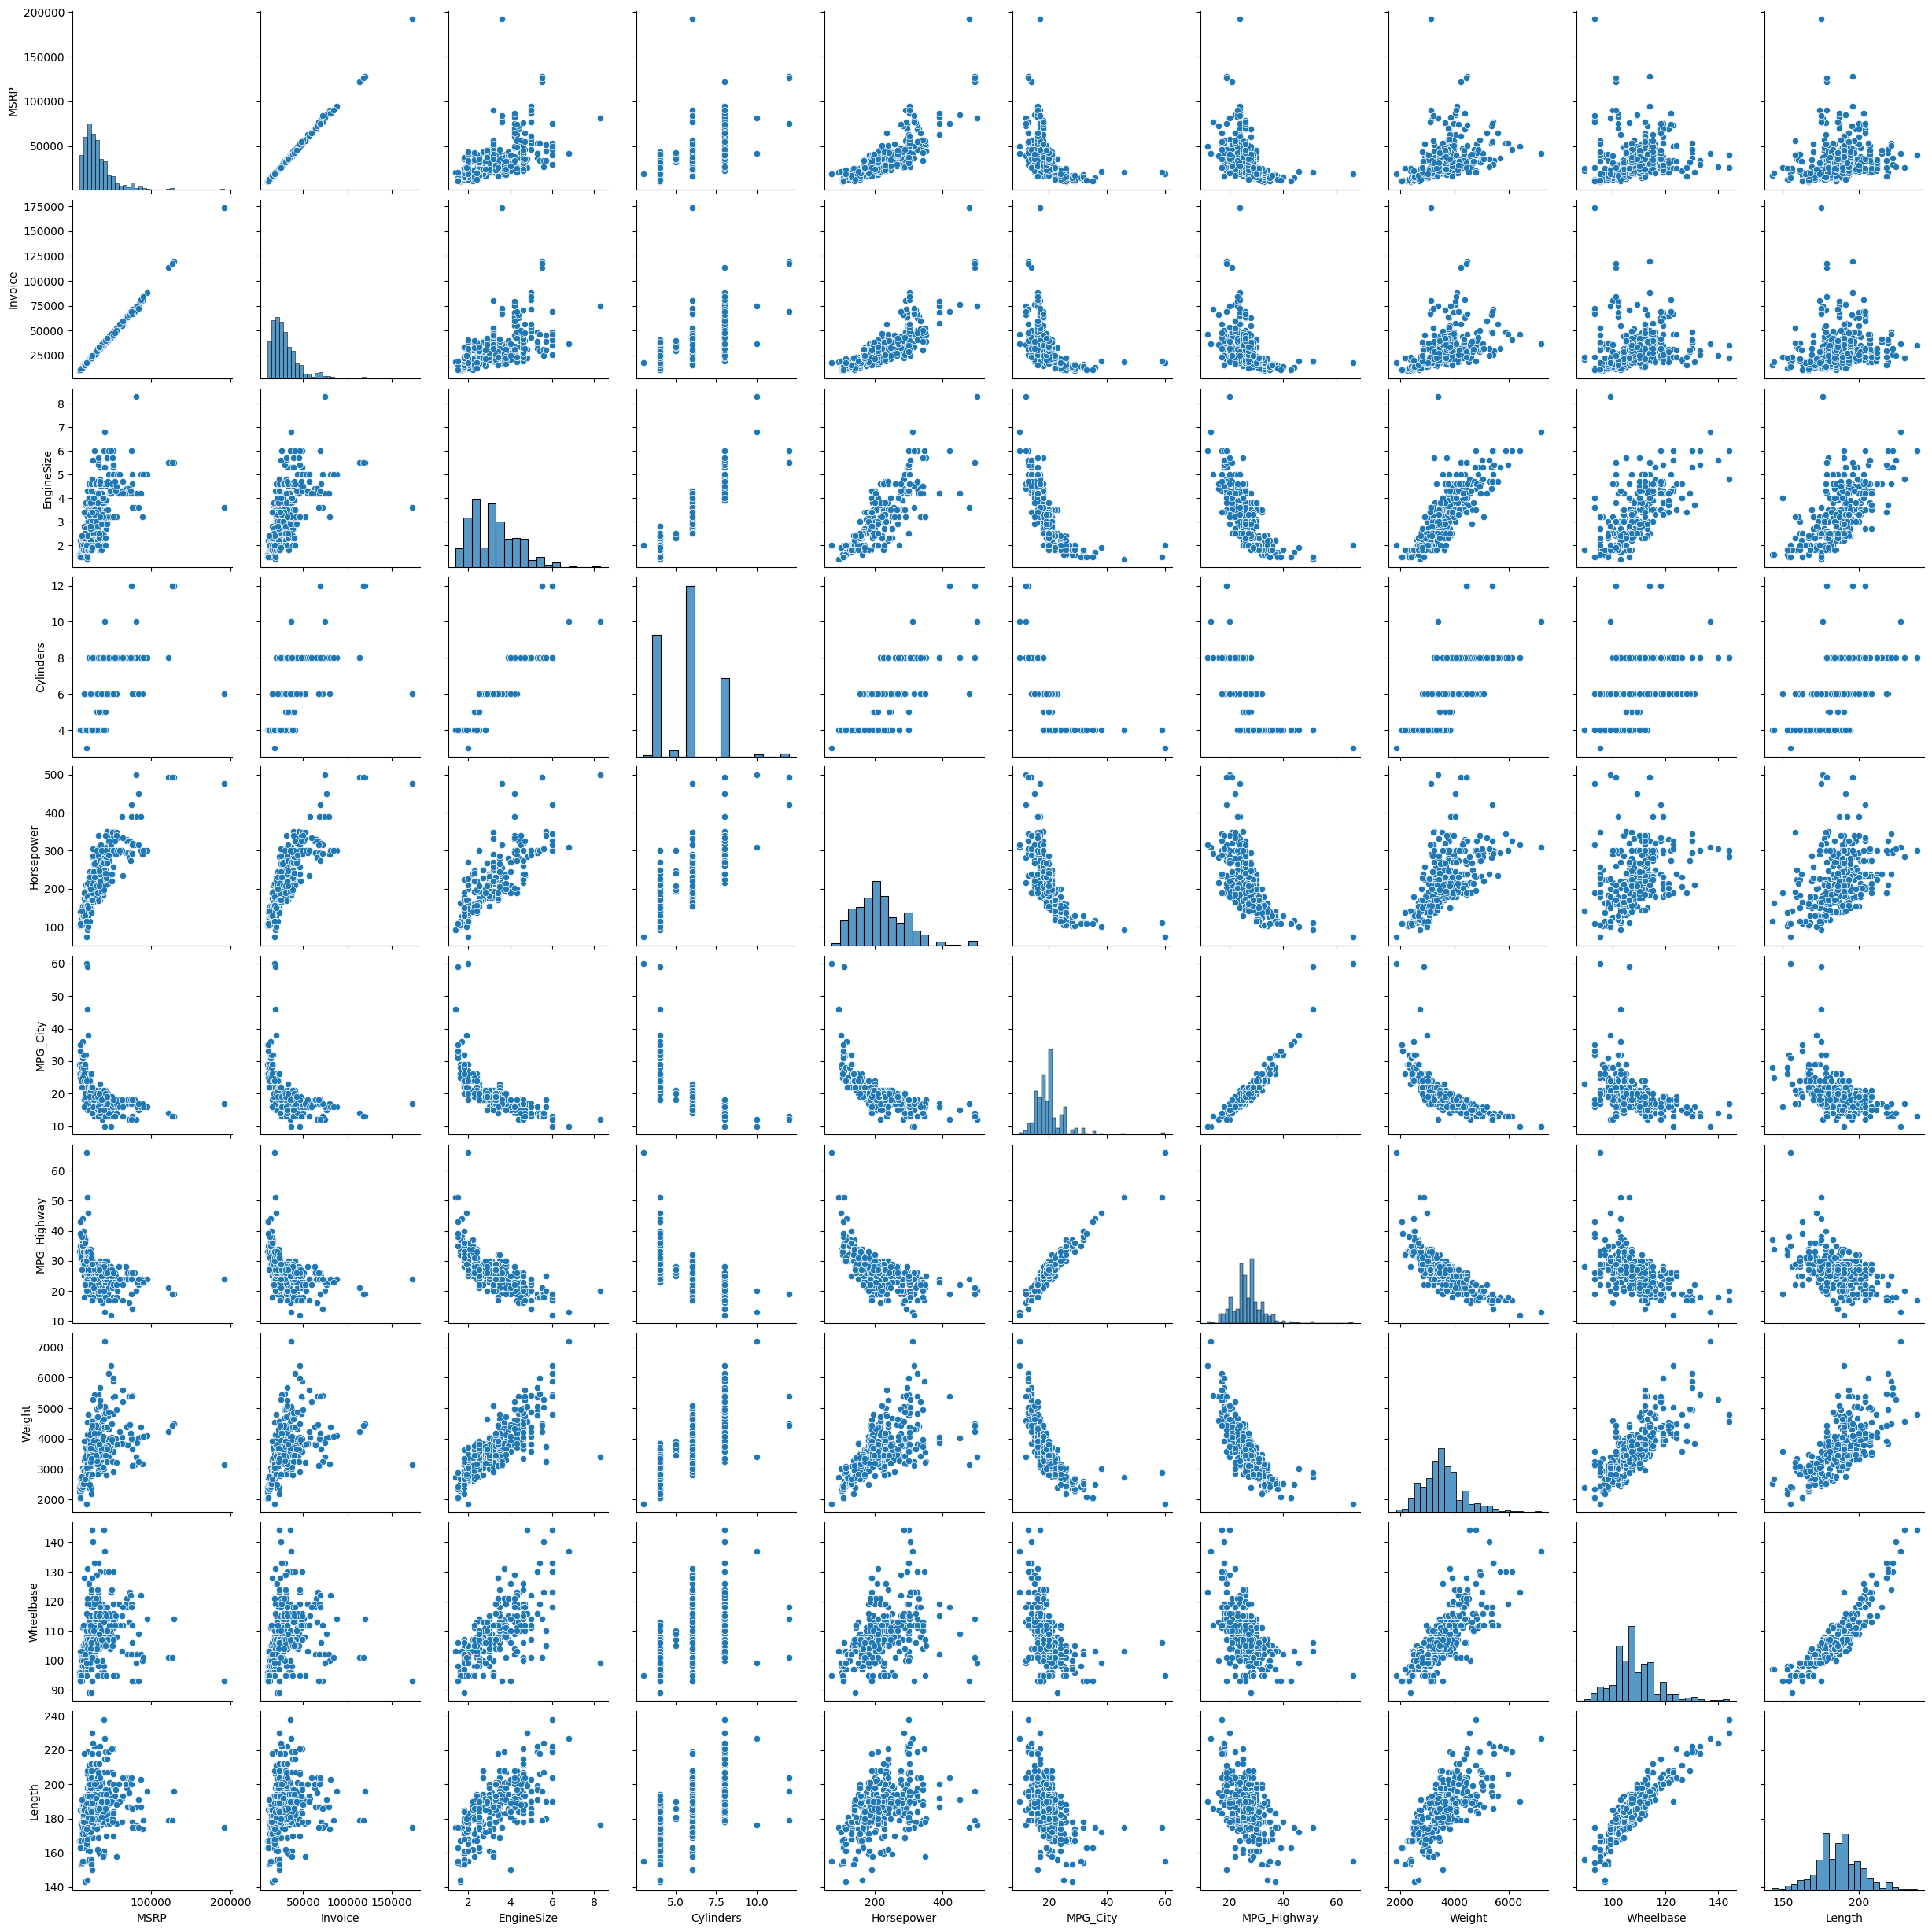

In [11]:
# Generate scatterplots for relationships
sns.pairplot(data = cardata2)

In [12]:
# Check unique car makers
cardata2['Make'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [13]:
# plot histogram for car makers
fig = px.histogram(cardata2, x= 'Make',
                    labels = {'Make': 'Manufacturer'},
                    color_discrete_sequence= ['blue'])
fig.show()

In [14]:
# Check car types
cardata2['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [15]:
fig = px.histogram(cardata2, x= 'Type',
                    labels = {'Type': 'Car Type'},
                    color_discrete_sequence= ['green'])
fig.show()

In [16]:
# Check car origin
cardata2['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [17]:
fig = px.histogram(cardata2, x= 'Origin',
                    labels = {'Origin': 'Origin'},
                    color_discrete_sequence= ['brown'])
fig.show()

In [18]:
# Check drive train
cardata2['DriveTrain'].unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [19]:
fig = px.histogram(cardata2, x= 'DriveTrain',
                    labels = {'DriveTrain': 'Drivetrain'},
                    color_discrete_sequence= ['purple'])
fig.show()

In [20]:
#Plot the maker of the car and its origin location
fig = px.histogram(cardata2, x= 'Make',
                    labels = {'Make': 'Manufacturer'},
                    color= 'Origin', title = "Maker of the car VS Location")
fig.show()

In [21]:
#Plot the maker of the car and car type
fig = px.histogram(cardata2, x= 'Make',
                    labels = {'Make': 'Manufacturer'},
                    color= 'Type', title = "Maker of the car VS Car type")
fig.show()

In [22]:
from wordcloud import WordCloud, STOPWORDS

text = cardata2['Model'].values
stopwords = set(STOPWORDS)

wc = WordCloud(background_color= 'black', max_words=2000, max_font_size= 100, random_state=3,
               stopwords= stopwords, contour_width= 3).generate(str(text))

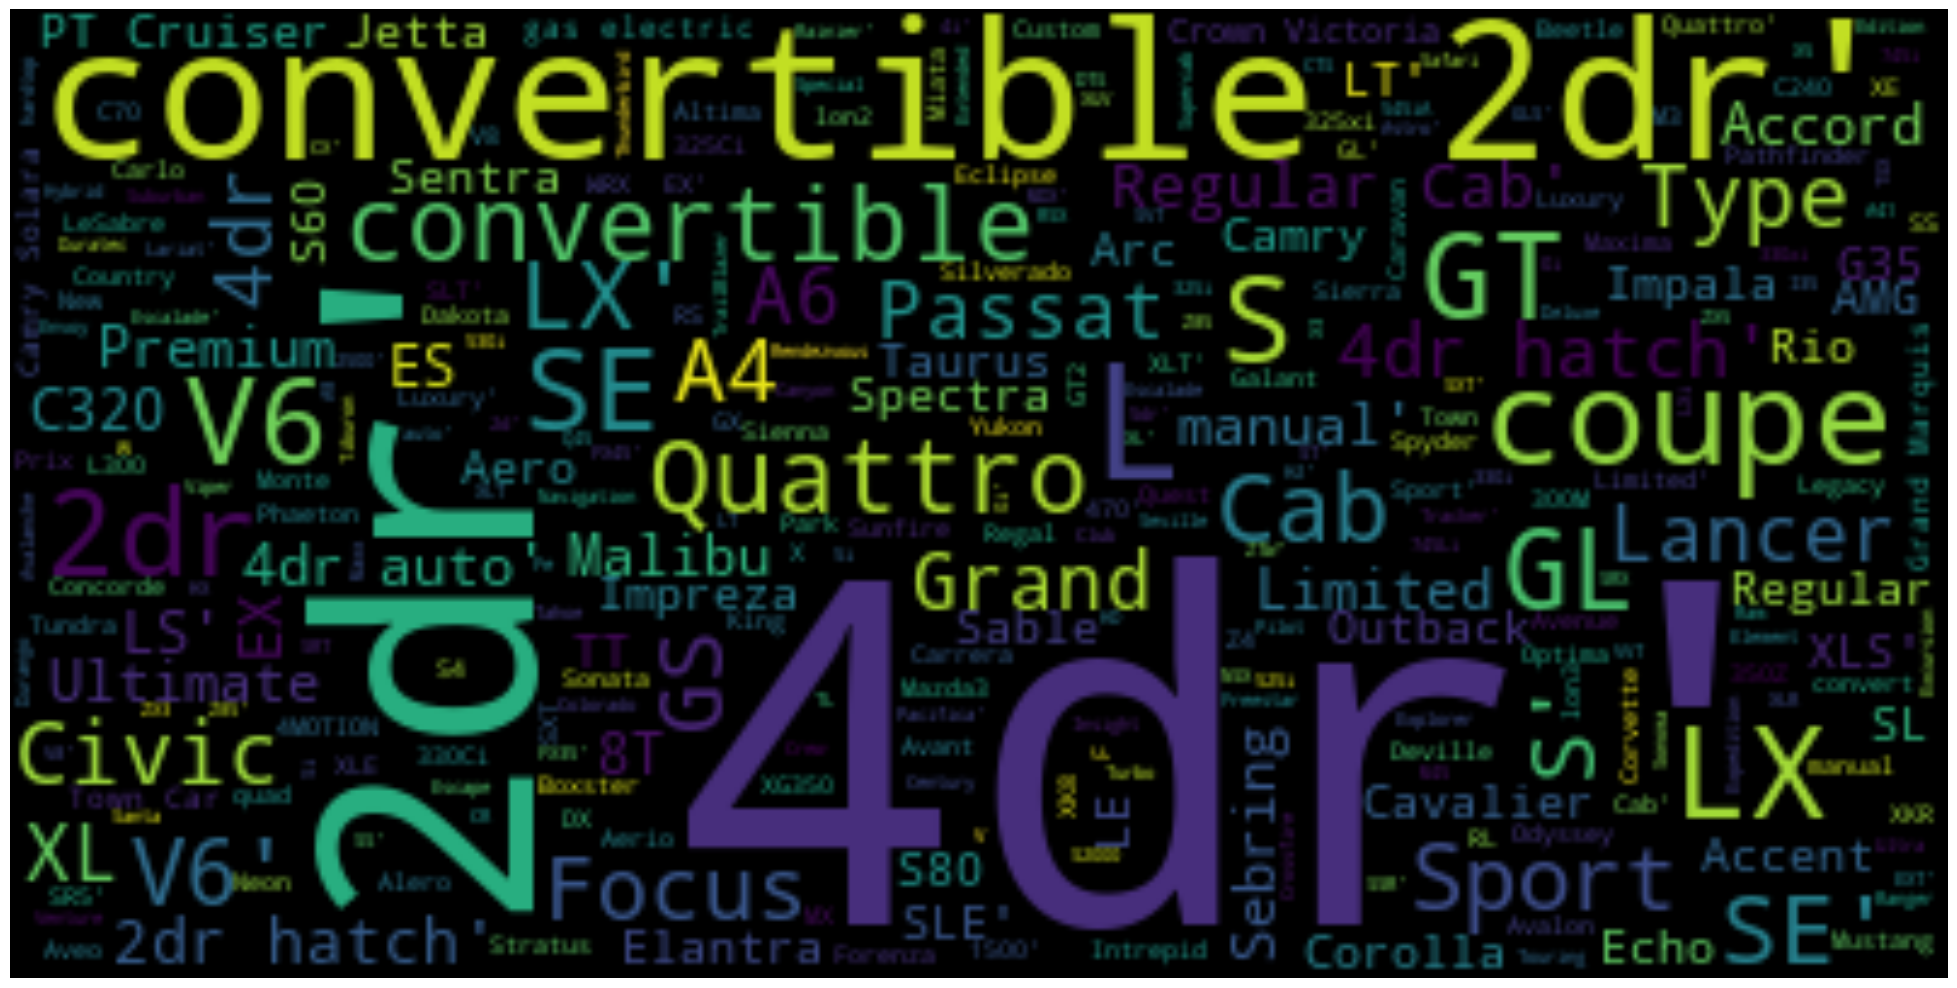

In [23]:
fig = plt.figure(figsize=(25,15))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [24]:
# Obtain the correlation matrix

cardata2.corr(method='pearson', numeric_only=True) 

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.573238,0.649742,0.827296,-0.475916,-0.440523,0.447987,0.151665,0.171060
Invoice,0.999132,1.000000,0.566019,0.645226,0.824079,-0.471304,-0.435452,0.441916,0.148003,0.165645
EngineSize,0.573238,0.566019,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.827296,0.824079,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.475916,-0.471304,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.440523,-0.435452,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.447987,0.441916,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.151665,0.148003,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.171060,0.165645,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


<Axes: >

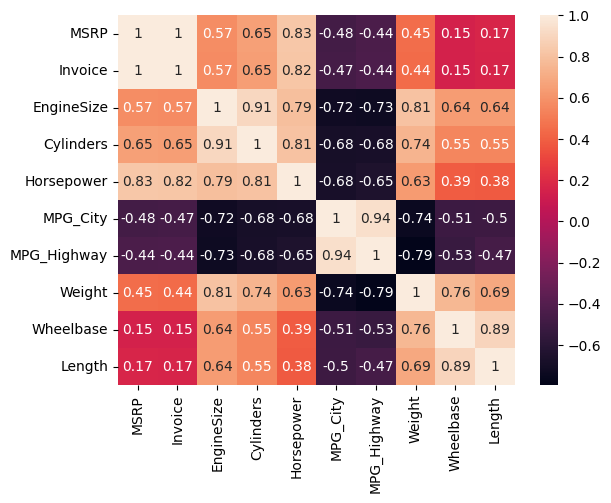

In [25]:
sns.heatmap(cardata2.corr(method='pearson', numeric_only=True) , annot=True)

Features with highest positive correlation with MSRP variable: </p>
1- EngineSize </br>
2- Cylinders</br>
3- Horsepower

# 4. Prepare data before model training

In [26]:
cardata2.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [27]:
#Convert categorical variables (Make, Model, Type, Origin, DriveTrain) to numeric by performing one-hot encoding

cardatadummies = pd.get_dummies(cardata2, columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], dtype=int)

cardatadummies

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,0,0,0,0,1,0,0,1,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,1,0,0,0,1,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,...,1,0,0,0,1,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,...,1,0,0,0,1,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,38203,2.4,5.0,197,21,28,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
424,42565,40083,2.3,5.0,242,20,26,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
425,45210,42573,2.9,6.0,268,19,26,3653,110,190,...,1,0,0,0,0,1,0,0,1,0
426,26135,24641,1.9,4.0,170,22,29,2822,101,180,...,0,0,0,1,0,1,0,0,1,0


In [28]:
#Drop Invoice feature as it does not contribute to car price prediction as shown in correlation matrix.

car_df = cardatadummies.drop(columns=['Invoice'], axis=1)
car_df

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5.0,197,21,28,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
424,42565,2.3,5.0,242,20,26,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
425,45210,2.9,6.0,268,19,26,3653,110,190,0,...,1,0,0,0,0,1,0,0,1,0
426,26135,1.9,4.0,170,22,29,2822,101,180,0,...,0,0,0,1,0,1,0,0,1,0


In [29]:
#Feeding input features to X and output (MSRP) to y
y = car_df['MSRP']
X = car_df.drop('MSRP', axis=1)

X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
#Verifying split was done successfully.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(340, 481) (86, 481) (340,) (86,)


# 5. Train and evaluate multiple linear regression

In [32]:
from sklearn.linear_model import LinearRegression #import linear regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score #import metrics module and specific functions
from math import sqrt

LinearRegression_model = LinearRegression() #Load the model into a variable 
LinearRegression_model.fit(X_train, y_train) #Fit the training data to the model

LinearRegression()

In [33]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8148450898553269

# 6. Train and evaluate decision tree regressor and random forest models

In [34]:
from sklearn.tree import  DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor() #create an instance of the model
DecisionTree_model.fit(X_train,  y_train) # fit the training data into the model

DecisionTreeRegressor()

In [35]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.748911686807815

In [36]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators= 5, max_depth= 5) #create an instance of the model
RandomForest_model.fit(X_train,  y_train) # fit the training data into the model

RandomForestRegressor(max_depth=5, n_estimators=5)

In [37]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8124104974035513

# 7. Using XGBoost algorithm

In [38]:
from xgboost import XGBRegressor
Xgboost_model = XGBRegressor() 
Xgboost_model.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
accuracy_Xgboost = Xgboost_model.score(X_test, y_test)
accuracy_Xgboost

0.907798843147755

In [42]:
#comparing all models

print('Multiple linear regression: %.2f' % accuracy_LinearRegression)
print('Decision Tree regression: %.2f' % accuracy_DecisionTree)
print('Random Forest regression: %.2f' % accuracy_RandomForest)
print('XGBoost regression: %.2f' % accuracy_Xgboost)


Multiple linear regression: 0.81
Decision Tree regression: 0.75
Random Forest regression: 0.81
XGBoost regression: 0.91


# 8. Compare models and calculate regression KPIs 

### Linear regression model

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

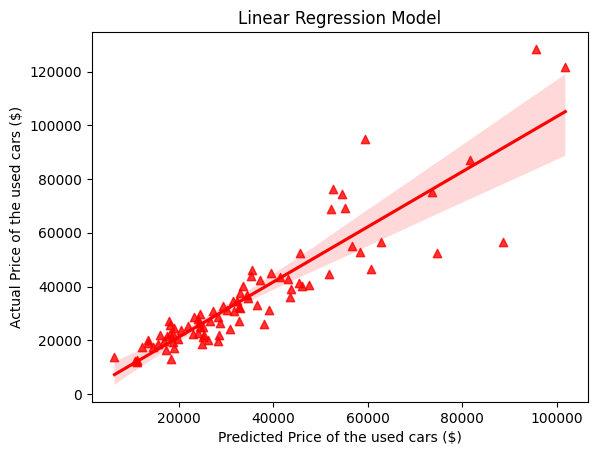

In [51]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(x=y_predict_linear,y= y_test, color = 'red', marker = '^')
fig.set(title = 'Linear Regression Model', xlabel = 'Predicted Price of the used cars ($)', ylabel = 'Actual Price of the used cars ($)')

### Random Forest

[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

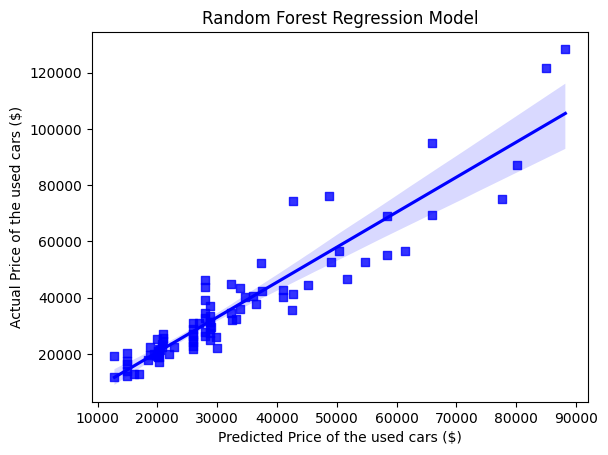

In [52]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(x=y_predict_RandomForest,y= y_test, color = 'blue', marker = 's')
fig.set(title = 'Random Forest Regression Model', xlabel = 'Predicted Price of the used cars ($)', ylabel = 'Actual Price of the used cars ($)')

### XGBoost

[Text(0.5, 1.0, 'XGBoost Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

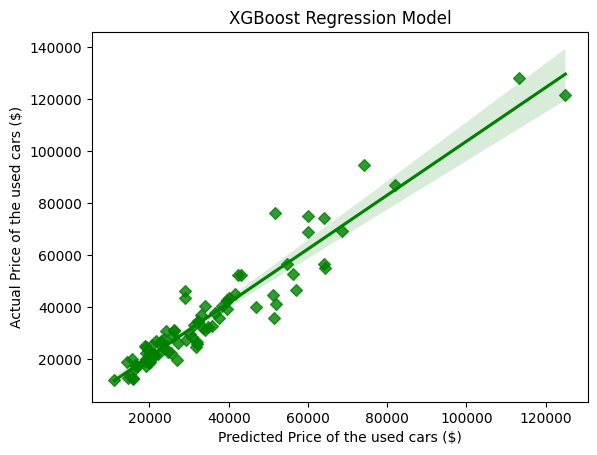

In [53]:
y_predict_xgboost = Xgboost_model.predict(X_test)

fig = sns.regplot(x=y_predict_xgboost,y= y_test, color = 'green', marker = 'D')
fig.set(title = 'XGBoost Regression Model', xlabel = 'Predicted Price of the used cars ($)', ylabel = 'Actual Price of the used cars ($)')

In [54]:
y_predict_xgboost

array([124951.54 ,  23760.514,  32119.432,  32147.588,  51128.51 ,
        27102.764,  51938.477,  36605.164,  32964.64 ,  28868.416,
        64139.92 ,  30160.926,  14391.624,  19760.197,  20146.934,
        23217.613,  34845.586,  64107.023, 113342.164,  20883.824,
        39991.33 ,  26251.969,  26011.592,  54743.215,  16365.667,
        19536.75 ,  51744.52 ,  35744.6  ,  15787.641,  25372.182,
        18982.809,  74083.875,  42388.9  ,  64209.54 ,  38254.64 ,
        15783.351,  39533.066,  31824.277,  28868.416,  60104.41 ,
        21449.775,  15166.123,  24593.605,  32210.19 ,  19024.197,
        43004.266,  37669.74 ,  16732.236,  30765.887,  24196.854,
        19240.04 ,  33496.99 ,  19116.04 ,  19575.14 ,  32014.85 ,
        51455.664,  20166.746,  46859.12 ,  20702.014,  23924.55 ,
        21715.887,  21119.072,  56898.508,  26174.74 ,  20058.945,
        34013.88 ,  19807.178,  22883.3  ,  56347.68 ,  11163.838,
        19247.531,  15661.337,  26856.01 ,  18977.053,  16277.